In [6]:
import sys
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt



path='/home/jbohne/sbu/'
sys.path.append(f'{path}taq_db/TAQ-Query-Scripts/data')
sys.path.append(f'{path}research/Adaptive_Signal_Estimation_Private')

from trend_filtering.adaptive_tf import adaptive_tf
from trend_filtering.test_adaptive_tf import test_adaptive_tf
from profiling.profiler import profile

In [7]:
trades=pd.read_csv(f'{path}taq_db/TAQ-Query-Scripts/data/AAPL_trades.csv',index_col=0).dropna()

price=trades['Trade_Price'].values

In [8]:
price.flags

  C_CONTIGUOUS : True
  F_CONTIGUOUS : True
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False

### Cross Validation is 10 fold + OOS Fit

Duality Gap is 2.5699999999998226
pobj: 2.5699999999998226 ,dobj: 0.0, gap: 2.5699999999998226
0.023171447471622593
Duality Gap is 2.5699999938055176
1.0
Duality Gap is 2.662561207808868
3.388943985809381e-17
Duality Gap is 2.6625612078353385
3.3889445590418e-17
Duality Gap is 2.66256120786181
3.38894515167638e-17
Duality Gap is 2.6625612078882797
pobj: 2.575249968830529 ,dobj: -0.0873112390577507, gap: 2.6625612078882797
3.388946129565198e-17
Duality Gap is 2.662561207914751
3.388945600857546e-17
Duality Gap is 2.662561207941221
3.388945637762115e-17
Duality Gap is 2.6625612079676904
3.388938834909188e-17
Duality Gap is 2.662561207994161
3.388993674541961e-17
Duality Gap is 2.662561208020638
pobj: 2.575249968864177 ,dobj: -0.08731123915646108, gap: 2.662561208020638
3.3890017335860674e-17
Duality Gap is 2.662561208047114
3.38885826728411e-17
Duality Gap is 2.6625612080735834
3.3890018273373314e-17
Duality Gap is 2.6625612081000587
3.3894699871607e-17
Duality Gap is 2.662561208126518
3

ValueError: x, y, and format string must not be None

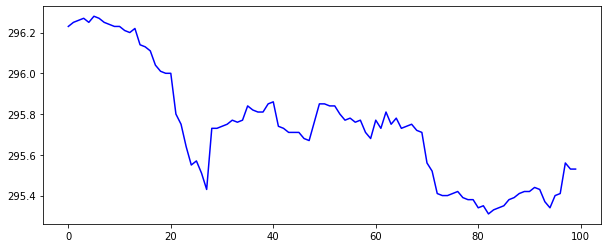

In [10]:


test_adaptive_tf(price,100,plot=True)

